In [5]:
from source import seasonalregressor
from source import data_wrangle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import pickle
from sklearn.metrics import mean_squared_error
%matplotlib inline

advanced = data_wrangle.read_all_advanced('./data/advanced')
pergame  = data_wrangle.read_all_pergame('./data/per_game')
seasonal = data_wrangle.clean_and_join_seasonal_dataframe(advanced, pergame)
demographic = data_wrangle.read_demographic_data('./data/player_data.csv')
fullstats = data_wrangle.add_years_in_league(seasonal, demographic)

cols_to_train_from_correlation = ['WS',
 'OWS',
 'VORP',
 'DWS',
 'MP_total',
 'PS/G',
 'FG',
 'MP_pergame',
 'GS',
 'FT',
 '2P',
 'FTA',
 'FGA',
 '2PA',
 'DRB']

with open('train_test.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    trainnames, testnames = pickle.load(f)
    
actuals = data_wrangle.get_actuals_for_years_5_thru_9(fullstats, testnames)

In [6]:
sr3 = seasonalregressor.SeasonalRegressor(columns_to_train=cols_to_train_from_correlation)
fulltrain, fulltest = sr3.create_train_test_split(fullstats, trainnames, testnames)
sr3 = sr3.fit(fulltrain)

Number of players:  275  with full season data for seasons: {1, 2, 3, 4, 5}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 5
Number of players:  275  with full season data for seasons: {1, 2, 3, 4, 6}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 6
Number of players:  275  with full season data for seasons: {1, 2, 3, 4, 7}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 7
Number of players:  275  with full season data for seasons: {1, 2, 3, 4, 8}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'P

In [7]:
preds = sr3.predict(fulltest)
predictions = sr3.unpack_prediction_dictionary(preds)
score = mean_squared_error(actuals, predictions)

Predicting year: 5 for player:  Robin Lopez
Predicting year: 5 for player:  Vitaly Potapenko
Predicting year: 5 for player:  Erick Strickland
Predicting year: 5 for player:  Tyronn Lue
Predicting year: 5 for player:  Stephon Marbury
Predicting year: 5 for player:  Rasual Butler
Predicting year: 5 for player:  Shawn Marion
Predicting year: 5 for player:  Spencer Hawes
Predicting year: 5 for player:  Kris Humphries
Predicting year: 5 for player:  Jason Williams
Predicting year: 5 for player:  Kirk Hinrich
Predicting year: 5 for player:  Kobe Bryant
Predicting year: 5 for player:  Shannon Brown
Predicting year: 5 for player:  Cuttino Mobley
Predicting year: 5 for player:  Andrea Bargnani
Predicting year: 5 for player:  Tony Battie
Predicting year: 5 for player:  Francisco Garcia
Predicting year: 5 for player:  Jake Voskuhl
Predicting year: 5 for player:  Steve Nash
Predicting year: 5 for player:  Dwyane Wade
Predicting year: 5 for player:  Jared Jeffries
Predicting year: 5 for player:  Br

Weighted mean based on game*seasons_numbers--code in this iteration used the helper_function.weighted_mean with multiple columns.  Note that it increased.

In [8]:
score

6.085970535483871

In [16]:
import importlib
importlib.reload(seasonalregressor)

<module 'source.seasonalregressor' from '/Users/kv/workspace/kv-capstone/NBAwinshare/source/seasonalregressor.py'>

In [17]:
sr4 = seasonalregressor.SeasonalRegressor(columns_to_train=cols_to_train_from_correlation)
fulltrain, fulltest = sr4.create_train_test_split(fullstats, trainnames, testnames)
sr4 = sr4.fit(fulltrain)
preds4 = sr4.predict(fulltest)
predictions4 = sr4.unpack_prediction_dictionary(preds4)
score = mean_squared_error(actuals, predictions4)

Number of players:  275  with full season data for seasons: {1, 2, 3, 4, 5}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 5
Number of players:  275  with full season data for seasons: {1, 2, 3, 4, 6}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 6
Number of players:  275  with full season data for seasons: {1, 2, 3, 4, 7}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 7
Number of players:  275  with full season data for seasons: {1, 2, 3, 4, 8}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'P

Predicting year: 9 for player:  Sasha Pavlovic
Predicting year: 9 for player:  Antawn Jamison
Predicting year: 9 for player:  Brian Cook
Predicting year: 9 for player:  Mike Dunleavy
Predicting year: 9 for player:  Bruce Bowen
Predicting year: 9 for player:  Goran Dragic


In [18]:
score

5.505392238709677

In [19]:
from source.helper_functions import weighted_mean_multi_col_weight as wm2

In [20]:
sr5 = seasonalregressor.SeasonalRegressor(columns_to_train=cols_to_train_from_correlation, function=wm2)
fulltrain, fulltest = sr5.create_train_test_split(fullstats, trainnames, testnames)
sr5 = sr5.fit(fulltrain)
preds5 = sr5.predict(fulltest)
predictions5 = sr5.unpack_prediction_dictionary(preds5)


Number of players:  275  with full season data for seasons: {1, 2, 3, 4, 5}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 5
Number of players:  275  with full season data for seasons: {1, 2, 3, 4, 6}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 6
Number of players:  275  with full season data for seasons: {1, 2, 3, 4, 7}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 7
Number of players:  275  with full season data for seasons: {1, 2, 3, 4, 8}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'P

Predicting year: 9 for player:  Antawn Jamison
Predicting year: 9 for player:  Brian Cook
Predicting year: 9 for player:  Mike Dunleavy
Predicting year: 9 for player:  Bruce Bowen
Predicting year: 9 for player:  Goran Dragic


In [21]:
score

6.313445651612904

In [22]:
(score - mean_squared_error(actuals, predictions4))/ mean_squared_error(actuals, predictions4)

0.14677490319792608

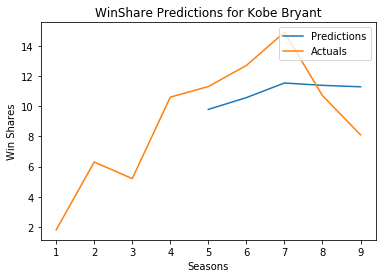

In [23]:
xdante,ydante = data_wrangle.get_actuals_for_first_x_years(fullstats, 'Kobe Bryant')
sr5.plot_player_arc('Kobe Bryant',preds4['Kobe Bryant'], actuals = ydante, actualseasons=xdante)

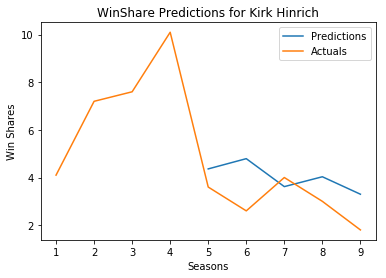

In [25]:
xdante,ydante = data_wrangle.get_actuals_for_first_x_years(fullstats, 'Kirk Hinrich')
sr5.plot_player_arc('Kirk Hinrich',preds4['Kirk Hinrich'], actuals = ydante, actualseasons=xdante)

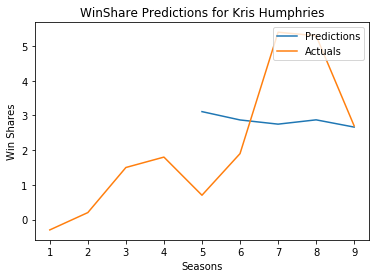

In [27]:
xdante,ydante = data_wrangle.get_actuals_for_first_x_years(fullstats, 'Kris Humphries')
sr5.plot_player_arc('Kris Humphries',preds4['Kris Humphries'], actuals = ydante, actualseasons=xdante)

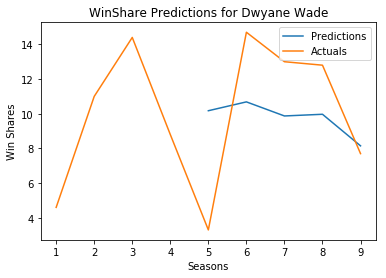

In [29]:
xdante,ydante = data_wrangle.get_actuals_for_first_x_years(fullstats, 'Dwyane Wade')
sr5.plot_player_arc('Dwyane Wade',preds4['Dwyane Wade'], actuals = ydante, actualseasons=xdante)

In [32]:
sr4 = seasonalregressor.SeasonalRegressor(columns_to_train=cols_to_train_from_correlation)
fulltrain, fulltest = sr4.create_train_test_split(fullstats, trainnames, testnames)
sr4 = sr4.fit(fulltrain)
preds4 = sr4.predict(fulltest)
predictions4 = sr4.unpack_prediction_dictionary(preds4)
score = mean_squared_error(actuals, predictions4)

Number of players:  275  with full season data for seasons: {1, 2, 3, 4, 5}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 5
Number of players:  275  with full season data for seasons: {1, 2, 3, 4, 6}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 6
Number of players:  275  with full season data for seasons: {1, 2, 3, 4, 7}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 7
Number of players:  275  with full season data for seasons: {1, 2, 3, 4, 8}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'P

Predicting year: 9 for player:  Sasha Pavlovic
Predicting year: 9 for player:  Antawn Jamison
Predicting year: 9 for player:  Brian Cook
Predicting year: 9 for player:  Mike Dunleavy
Predicting year: 9 for player:  Bruce Bowen
Predicting year: 9 for player:  Goran Dragic


In [33]:
score

5.716108180645163

In [54]:
fulltest.mean()['WS']

3.8577540106951895

In [36]:
fulltrain.mean()['WS']

3.7887850467289854

In [38]:
meanpred = fulltrain.mean()['WS']

In [49]:
meanpreds = [meanpred for i in range(len(actuals))]

In [50]:
score = mean_squared_error(actuals, meanpreds)

At least the score from the SeasonalRegressor is significantly better than just using the train-set average of Win-Shares

In [51]:
score

13.798268675387888

Ok, I realized I had a bug in my code.  Let's try to re-run the weighted mean functions with the bug fix.

In [56]:
importlib.reload(seasonalregressor)

<module 'source.seasonalregressor' from '/Users/kv/workspace/kv-capstone/NBAwinshare/source/seasonalregressor.py'>

In [57]:
sr5 = seasonalregressor.SeasonalRegressor(columns_to_train=cols_to_train_from_correlation, function=wm2)
fulltrain, fulltest = sr5.create_train_test_split(fullstats, trainnames, testnames)
sr5 = sr5.fit(fulltrain)
preds5 = sr5.predict(fulltest)
predictions5 = sr5.unpack_prediction_dictionary(preds5)
score = mean_squared_error(actuals, predictions5)


Number of players:  275  with full season data for seasons: {1, 2, 3, 4, 5}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 5
Number of players:  275  with full season data for seasons: {1, 2, 3, 4, 6}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 6
Number of players:  275  with full season data for seasons: {1, 2, 3, 4, 7}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 7
Number of players:  275  with full season data for seasons: {1, 2, 3, 4, 8}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'P

Predicting year: 9 for player:  Sasha Pavlovic
Predicting year: 9 for player:  Antawn Jamison
Predicting year: 9 for player:  Brian Cook
Predicting year: 9 for player:  Mike Dunleavy
Predicting year: 9 for player:  Bruce Bowen
Predicting year: 9 for player:  Goran Dragic
6.712204677419354


The MSE is worse than when I trained with different methodology than the predict

In [58]:
print(score)

6.712204677419354


In [60]:
from source.helper_functions import weighted_mean_one_col_weight as wm
sr5 = seasonalregressor.SeasonalRegressor(columns_to_train=cols_to_train_from_correlation, function=wm)
fulltrain, fulltest = sr5.create_train_test_split(fullstats, trainnames, testnames)
sr5 = sr5.fit(fulltrain)
preds5 = sr5.predict(fulltest)
predictions5 = sr5.unpack_prediction_dictionary(preds5)
score = mean_squared_error(actuals, predictions5)

Number of players:  275  with full season data for seasons: {1, 2, 3, 4, 5}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 5
Number of players:  275  with full season data for seasons: {1, 2, 3, 4, 6}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 6
Number of players:  275  with full season data for seasons: {1, 2, 3, 4, 7}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 7
Number of players:  275  with full season data for seasons: {1, 2, 3, 4, 8}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'P

Predicting year: 9 for player:  Sasha Pavlovic
Predicting year: 9 for player:  Antawn Jamison
Predicting year: 9 for player:  Brian Cook
Predicting year: 9 for player:  Mike Dunleavy
Predicting year: 9 for player:  Bruce Bowen
Predicting year: 9 for player:  Goran Dragic


In [61]:
print(score)

7.158257832258067


In [62]:
sr5 = seasonalregressor.SeasonalRegressor(columns_to_train=cols_to_train_from_correlation)
fulltrain, fulltest = sr5.create_train_test_split(fullstats, trainnames, testnames)
sr5 = sr5.fit(fulltrain)
preds5 = sr5.predict(fulltest)
predictions5 = sr5.unpack_prediction_dictionary(preds5)
score = mean_squared_error(actuals, predictions5)

Number of players:  275  with full season data for seasons: {1, 2, 3, 4, 5}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 5
Number of players:  275  with full season data for seasons: {1, 2, 3, 4, 6}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 6
Number of players:  275  with full season data for seasons: {1, 2, 3, 4, 7}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 7
Number of players:  275  with full season data for seasons: {1, 2, 3, 4, 8}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'P

Predicting year: 9 for player:  Sasha Pavlovic
Predicting year: 9 for player:  Antawn Jamison
Predicting year: 9 for player:  Brian Cook
Predicting year: 9 for player:  Mike Dunleavy
Predicting year: 9 for player:  Bruce Bowen
Predicting year: 9 for player:  Goran Dragic


In [63]:
print(score)

5.715934251612904
